In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import pandas as pd
from sklearn import manifold

In [39]:
# read csv
df = pd.read_csv("training.csv")


In [8]:
df[:2]

,Time,UserID,LocationX,LocationY,RSRP1,RSRQ1,RSRP2,RSRQ2,RSRP3,RSRQ3,RSRP4,RSRQ4,Label
0,0.2,1,1165.135603,157.155659,-71.781608,NaN,-76.114469,NaN,-76.421107,NaN,-77.007771,NaN,0
1,0.2,2,18.101453,97.904367,-69.099606,NaN,-71.002579,NaN,-74.648307,NaN,-76.255106,NaN,0


In [40]:
df.dropna(axis=0, how="any", inplace=True)
df.drop(df.columns[:4], axis=1, inplace=True)

In [10]:
df[:2]

,RSRP1,RSRQ1,RSRP2,RSRQ2,RSRP3,RSRQ3,RSRP4,RSRQ4,Label
105,-71.755991,-7.311372,-76.138194,-11.693575,-76.488951,-12.044332,-77.024481,-12.579862,0
106,-69.188802,-6.964777,-70.973079,-8.749054,-74.676671,-12.452646,-76.260539,-14.036514,0


In [41]:
y = df["Label"]

In [42]:
X = df.drop(df.columns[-1], axis=1)

In [43]:
X = X.values

In [14]:
X[:3]

array([[-71.75599101,  -7.31137152, -76.13819403, -11.69357455,
        -76.48895116, -12.04433167, -77.02448105, -12.57986156],
       [-69.18880179,  -6.96477654, -70.97307885,  -8.7490536 ,
        -74.67667079, -12.45264555, -76.26053884, -14.03651359],
       [-67.51533956,  -7.42328775, -69.91665259,  -9.82460078,
        -70.39465129, -10.30259948, -74.3988587 , -14.30680689]])

In [47]:
# mds with 2-dims
mds_2dims = manifold.MDS(2, max_iter=200, n_jobs=4)

In [15]:

X_train_2dims = mds_2dims.fit_transform(X)

In [18]:
len(X) == len(y)

True

In [19]:
X_train_2dims[:2]

array([[5.96974542, 7.24079593],
       [5.44968364, 0.982294  ]])

In [38]:
if len(X) == len(y):
    df_X_train_2dims = pd.DataFrame(X_train_2dims, columns=["dim1", "dim2"])
    y = list(y)
    df_X_train_2dims["label"] = y
    df_X_train_2dims.to_csv("./reduceDims/mds2dims_X_train.csv")

In [48]:
# apply MDS dimension reduction with reducing to 3 dims
mds_3dims = manifold.MDS(3, max_iter=200, n_jobs=4)

In [44]:

X_train_3dims = mds_3dims.fit_transform(X)
# np.savetxt("reduceDims/mds3dims_X_train.csv", X_train_3dims, delimiter=",")

In [45]:
X_train_3dims[:3]

array([[-4.47275158,  6.53715369,  4.69964362],
       [-3.83352553, -0.3369206 ,  4.02130609],
       [-6.60119928, -2.45308831, -0.18872512]])

In [46]:
if len(X) == len(y):
    df_X_train_3dims = pd.DataFrame(X_train_3dims, columns=["dim1", "dim2", "dim3"])
    y = list(y)
    df_X_train_3dims["label"] = y
    # save the reduced 3-dims to csv file
    df_X_train_3dims.to_csv("./reduceDims/mds3dims_X_train.csv")

In [51]:
df_test = pd.read_csv("simulation_data_2.csv")
df_test.dropna(axis=0, how="any", inplace=True)
df_test.drop(df.columns[:4], axis=1, inplace=True)
X_test = df_test.values

In [50]:

X_test_3dims = mds_3dims.fit_transform(X_test)
# save the reduced 3-dims to csv file
np.savetxt("./reduceDims/mds3dims_X_test.csv", X_test_3dims, delimiter=",")

In [52]:

X_test_2dims = mds_2dims.fit_transform(X_test)
# save the reduced 3-dims to csv file
np.savetxt("./reduceDims/mds2dims_X_test.csv", X_test_2dims, delimiter=",")

In [ ]:


# using LOF anomaly detection to test on train dataset


In [53]:
X_train_3dims[:3]

array([[-4.47275158,  6.53715369,  4.69964362],
       [-3.83352553, -0.3369206 ,  4.02130609],
       [-6.60119928, -2.45308831, -0.18872512]])

In [60]:
y_true = []
for i in y:
    if i == 0:
        y_true.append(1)
    elif i == 1:
        y_true.append(-1)
    else:
        print("error.....")

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
"""
The LOF algorithm is an unsupervised outlier detection method
"""
def local_outlier_factor_AD(X):
    clf = LocalOutlierFactor(n_neighbors=20)
    y_pred = clf.fit_predict(X)
    return y_pred

In [55]:
# 1 represents normal; -1 means outlier
y_train_3dims_pred = local_outlier_factor_AD(X_train_3dims)

In [64]:
from sklearn import metrics

In [72]:
print("-----3 dims result on train data((LOF algorithm))-----")
print(metrics.classification_report(y_true, y_train_3dims_pred,target_names=None))

-----3 dims result on train data((LOF algorithm))-----
             precision    recall  f1-score   support

         -1       0.08      0.13      0.10       597
          1       0.95      0.90      0.92      9903

avg / total       0.90      0.86      0.88     10500



In [68]:
X_train_2dims[:3]

array([[ 5.96974542,  7.24079593],
       [ 5.44968364,  0.982294  ],
       [ 6.04953984, -4.10218384]])

In [69]:
# 1 represents normal; -1 means outlier
y_train_2dims_pred = local_outlier_factor_AD(X_train_dims)

In [70]:
y_train_2dims_pred[:20]

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1])

In [71]:
print("-----2 dims result on train data(LOF algorithm)-----")
print(metrics.classification_report(y_true, y_train_2dims_pred,target_names=None))

-----2 dims result on train data-----
             precision    recall  f1-score   support

         -1       0.05      0.10      0.07       597
          1       0.94      0.90      0.92      9903

avg / total       0.89      0.85      0.87     10500



In [73]:
def isolationForest_AD(X):
    rng = np.random.RandomState(42)
    clf = IsolationForest(max_samples=100, random_state=rng)
    clf.fit(X)
    y_pred = clf.predict(X)
    return y_pred

In [74]:
y_train_3dims_iosforest_pred = isolationForest_AD(X_train_3dims)
print("-----3 dims result on train data(isolationForest algorithm)-----")
print(metrics.classification_report(y_true, y_train_3dims_iosforest_pred,target_names=None))

-----3 dims result on train data(isolationForest algorithm)-----
             precision    recall  f1-score   support

         -1       0.00      0.00      0.00       597
          1       0.94      0.89      0.92      9903

avg / total       0.88      0.84      0.86     10500



In [75]:
y_train_2dims_iosforest_pred = isolationForest_AD(X_train_2dims)
print("-----2 dims result on train data(isolationForest algorithm)-----")
print(metrics.classification_report(y_true, y_train_2dims_iosforest_pred,target_names=None))

-----2 dims result on train data(isolationForest algorithm)-----
             precision    recall  f1-score   support

         -1       0.00      0.00      0.00       597
          1       0.94      0.89      0.92      9903

avg / total       0.88      0.84      0.86     10500



In [ ]:
# precision, 意思就是将正常点判断为正常的,同时也把一些非正常的点判断为正常点,也就是误判


In [ ]:
# using 2-dims to visualize the anomaly and normal data points
for xi,yi in zip(X_train_2dims, y_true):
    

In [77]:
len(X_train_2dims)

10500

In [79]:
X_train_2dims[:3]

array([[ 5.96974542,  7.24079593],
       [ 5.44968364,  0.982294  ],
       [ 6.04953984, -4.10218384]])

In [80]:
X_train_2dims[:, 0]

array([ 5.96974542,  5.44968364,  6.04953984, ...,  9.0448751 ,
       -3.78379689,  8.4082536 ])

In [78]:
len(y_true)

10500

In [83]:
y_true.count(-1)

597

In [84]:
y_true.count(1)

9903

In [96]:
plt.title("the original dataset distribution")
plt.text(-25, 0, y_true.count(-1))
plt.scatter(X_train_2dims[:, 0], X_train_2dims[:, 1],c=y_true)

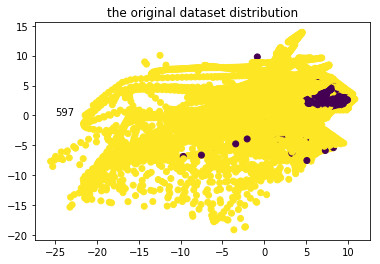

In [97]:
plt.show()

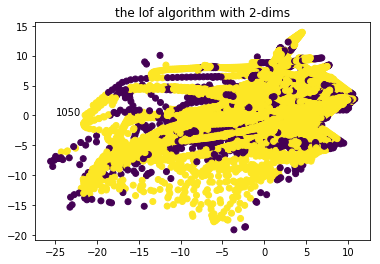

In [99]:
plt.title("the lof algorithm with 2-dims")
plt.text(-25, 0, list(y_train_2dims_pred).count(-1))
plt.scatter(X_train_2dims[:, 0], X_train_2dims[:, 1],c=y_train_2dims_pred)
plt.show()

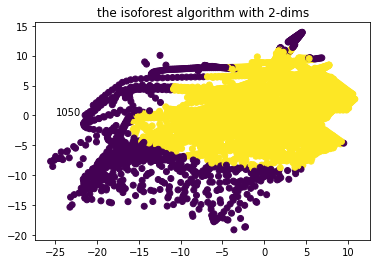

In [100]:
plt.title("the isoforest algorithm with 2-dims")
plt.text(-25, 0, list(y_train_2dims_iosforest_pred).count(-1))
plt.scatter(X_train_2dims[:, 0], X_train_2dims[:, 1],c=y_train_2dims_iosforest_pred)
plt.show()

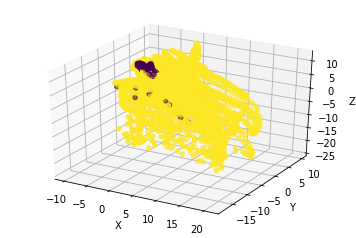

In [114]:
# -*- coding: utf-8 -*-
"""
Created on Thu Sep 24 16:37:21 2015

@author: Eddy_zheng
"""
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = np.random.randint(0, 255, size=[40, 40, 40])

x, y, z = X_train_3dims[:, 0], X_train_3dims[:, 1], X_train_3dims[:, 2]
ax = plt.subplot(111, projection='3d')  # 创建一个三维的绘图工程
#  将数据点分成三部分画，在颜色上有区分度
ax.scatter(x, y, z, c=y_true)  # 绘制数据点

ax.set_zlabel('Z')  # 坐标轴
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.show()


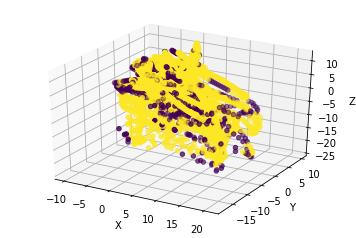

In [115]:
ax = plt.subplot(111, projection='3d')  # 创建一个三维的绘图工程
#  将数据点分成三部分画，在颜色上有区分度
ax.scatter(x, y, z, c=y_train_3dims_pred)  # 绘制数据点

ax.set_zlabel('Z')  # 坐标轴
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.show()

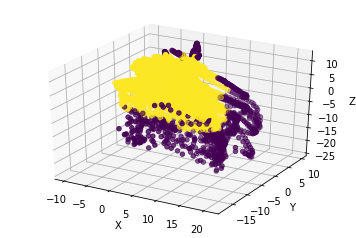

In [116]:
ax = plt.subplot(111, projection='3d')  # 创建一个三维的绘图工程
#  将数据点分成三部分画，在颜色上有区分度
ax.scatter(x, y, z, c=y_train_3dims_iosforest_pred)  # 绘制数据点

ax.set_zlabel('Z')  # 坐标轴
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.show()

In [30]:
def local_outlier_factor():
    
    np.random.seed(42)

    # Generate train data
    X = 0.3 * np.random.randn(100, 2)
    # Generate some abnormabl novel observations
    X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
    X = np.r_[X + 2, X - 2, X_outliers]

    # fit the model
    clf = LocalOutlierFactor(n_neighbors=20)
    y_pred = clf.fit_predict(X)
    y_pred_outliers = y_pred[200:]

    # plot the level sets of the decision function
    xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
    Z = clf._decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.title("Local Outlier Factor (LOF)")
    plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

    a = plt.scatter(X[:200, 0], X[:200, 1], c='white',
                    edgecolor='k', s=20)
    b = plt.scatter(X[200:, 0], X[200:, 1], c='red',
                    edgecolor='k', s=20)
    plt.axis('tight')
    plt.xlim((-5, 5))
    plt.ylim((-5, 5))
    plt.legend([a, b],
               ["normal observations",
                "abnormal observations"],
               loc="upper left")
    plt.show()

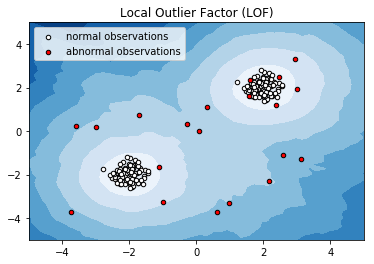

In [31]:
local_outlier_factor()

In [32]:
# input X_train data into local_outlier_factor
clf = LocalOutlierFactor(n_neighbors=20)
y_pred = clf.fit_predict(threeDimSig)

In [117]:
# lof 的论文的具体算法实现
# https://github.com/damjankuznar/pylof
#!/usr/bin/python
# -*- coding: utf8 -*-
"""
lof
~~~~~~~~~~~~

This module implements the Local Outlier Factor algorithm.

:copyright: (c) 2013 by Damjan Kužnar.
:license: GNU GPL v2, see LICENSE for more details.

"""
from __future__ import division
import warnings

def distance_euclidean(instance1, instance2):
    """Computes the distance between two instances. Instances should be tuples of equal length.
    Returns: Euclidean distance
    Signature: ((attr_1_1, attr_1_2, ...), (attr_2_1, attr_2_2, ...)) -> float"""
    def detect_value_type(attribute):
        """Detects the value type (number or non-number).
        Returns: (value type, value casted as detected type)
        Signature: value -> (str or float type, str or float value)"""
        from numbers import Number
        attribute_type = None
        if isinstance(attribute, Number):
            attribute_type = float
            attribute = float(attribute)
        else:
            attribute_type = str
            attribute = str(attribute)
        return attribute_type, attribute
    # check if instances are of same length
    if len(instance1) != len(instance2):
        raise AttributeError("Instances have different number of arguments.")
    # init differences vector
    differences = [0] * len(instance1)
    # compute difference for each attribute and store it to differences vector
    for i, (attr1, attr2) in enumerate(zip(instance1, instance2)):
        type1, attr1 = detect_value_type(attr1)
        type2, attr2 = detect_value_type(attr2)
        # raise error is attributes are not of same data type.
        if type1 != type2:
            raise AttributeError("Instances have different data types.")
        if type1 is float:
            # compute difference for float
            differences[i] = attr1 - attr2
        else:
            # compute difference for string
            if attr1 == attr2:
                differences[i] = 0
            else:
                differences[i] = 1
    # compute RMSE (root mean squared error)
    rmse = (sum(map(lambda x: x**2, differences)) / len(differences))**0.5
    return rmse

class LOF:
    """Helper class for performing LOF computations and instances normalization."""
    def __init__(self, instances, normalize=True, distance_function=distance_euclidean):
        self.instances = instances
        self.normalize = normalize
        self.distance_function = distance_function
        if normalize:
            self.normalize_instances()

    def compute_instance_attribute_bounds(self):
        min_values = [float("inf")] * len(self.instances[0]) #n.ones(len(self.instances[0])) * n.inf
        max_values = [float("-inf")] * len(self.instances[0]) #n.ones(len(self.instances[0])) * -1 * n.inf
        for instance in self.instances:
            min_values = tuple(map(lambda x,y: min(x,y), min_values,instance)) #n.minimum(min_values, instance)
            max_values = tuple(map(lambda x,y: max(x,y), max_values,instance)) #n.maximum(max_values, instance)

        diff = [dim_max - dim_min for dim_max, dim_min in zip(max_values, min_values)]
        if not all(diff):
            problematic_dimensions = ", ".join(str(i+1) for i, v in enumerate(diff) if v == 0)
            warnings.warn("No data variation in dimensions: %s. You should check your data or disable normalization." % problematic_dimensions)

        self.max_attribute_values = max_values
        self.min_attribute_values = min_values

    def normalize_instances(self):
        """Normalizes the instances and stores the infromation for rescaling new instances."""
        if not hasattr(self, "max_attribute_values"):
            self.compute_instance_attribute_bounds()
        new_instances = []
        for instance in self.instances:
            new_instances.append(self.normalize_instance(instance)) # (instance - min_values) / (max_values - min_values)
        self.instances = new_instances

    def normalize_instance(self, instance):
        return tuple(map(lambda value,max,min: (value-min)/(max-min) if max-min > 0 else 0,
                         instance, self.max_attribute_values, self.min_attribute_values))

    def local_outlier_factor(self, min_pts, instance):
        """The (local) outlier factor of instance captures the degree to which we call instance an outlier.
        min_pts is a parameter that is specifying a minimum number of instances to consider for computing LOF value.
        Returns: local outlier factor
        Signature: (int, (attr1, attr2, ...), ((attr_1_1, ...),(attr_2_1, ...), ...)) -> float"""
        if self.normalize:
            instance = self.normalize_instance(instance)
        return local_outlier_factor(min_pts, instance, self.instances, distance_function=self.distance_function)

def k_distance(k, instance, instances, distance_function=distance_euclidean):
    #TODO: implement caching
    """Computes the k-distance of instance as defined in paper. It also gatheres the set of k-distance neighbours.
    Returns: (k-distance, k-distance neighbours)
    Signature: (int, (attr1, attr2, ...), ((attr_1_1, ...),(attr_2_1, ...), ...)) -> (float, ((attr_j_1, ...),(attr_k_1, ...), ...))"""
    distances = {}
    for instance2 in instances:
        distance_value = distance_function(instance, instance2)
        if distance_value in distances:
            distances[distance_value].append(instance2)
        else:
            distances[distance_value] = [instance2]
    distances = sorted(distances.items())
    neighbours = []
    [neighbours.extend(n[1]) for n in distances[:k]]
    k_distance_value = distances[k - 1][0] if len(distances) >= k else distances[-1][0]
    return k_distance_value, neighbours

def reachability_distance(k, instance1, instance2, instances, distance_function=distance_euclidean):
    """The reachability distance of instance1 with respect to instance2.
    Returns: reachability distance
    Signature: (int, (attr_1_1, ...),(attr_2_1, ...)) -> float"""
    (k_distance_value, neighbours) = k_distance(k, instance2, instances, distance_function=distance_function)
    return max([k_distance_value, distance_function(instance1, instance2)])

def local_reachability_density(min_pts, instance, instances, **kwargs):
    """Local reachability density of instance is the inverse of the average reachability
    distance based on the min_pts-nearest neighbors of instance.
    Returns: local reachability density
    Signature: (int, (attr1, attr2, ...), ((attr_1_1, ...),(attr_2_1, ...), ...)) -> float"""
    (k_distance_value, neighbours) = k_distance(min_pts, instance, instances, **kwargs)
    reachability_distances_array = [0]*len(neighbours) #n.zeros(len(neighbours))
    for i, neighbour in enumerate(neighbours):
        reachability_distances_array[i] = reachability_distance(min_pts, instance, neighbour, instances, **kwargs)
    if not any(reachability_distances_array):
        warnings.warn("Instance %s (could be normalized) is identical to all the neighbors. Setting local reachability density to inf." % repr(instance))
        return float("inf")
    else:
        return len(neighbours) / sum(reachability_distances_array)

def local_outlier_factor(min_pts, instance, instances, **kwargs):
    """The (local) outlier factor of instance captures the degree to which we call instance an outlier.
    min_pts is a parameter that is specifying a minimum number of instances to consider for computing LOF value.
    Returns: local outlier factor
    Signature: (int, (attr1, attr2, ...), ((attr_1_1, ...),(attr_2_1, ...), ...)) -> float"""
    (k_distance_value, neighbours) = k_distance(min_pts, instance, instances, **kwargs)
    instance_lrd = local_reachability_density(min_pts, instance, instances, **kwargs)
    lrd_ratios_array = [0]* len(neighbours)
    for i, neighbour in enumerate(neighbours):
        instances_without_instance = set(instances)
        instances_without_instance.discard(neighbour)
        neighbour_lrd = local_reachability_density(min_pts, neighbour, instances_without_instance, **kwargs)
        lrd_ratios_array[i] = neighbour_lrd / instance_lrd
    return sum(lrd_ratios_array) / len(neighbours)

def outliers(k, instances, **kwargs):
    """Simple procedure to identify outliers in the dataset."""
    instances_value_backup = instances
    outliers = []
    for i, instance in enumerate(instances_value_backup):
        instances = list(instances_value_backup)
        instances.remove(instance)
        l = LOF(instances, **kwargs)
        value = l.local_outlier_factor(k, instance)
        if value > 1:
            outliers.append({"lof": value, "instance": instance, "index": i})
    outliers.sort(key=lambda o: o["lof"], reverse=True)
    return outliers

In [122]:
lof = LOF(X_train_2dims[:100])

AttributeError: 'numpy.ndarray' object has no attribute 'value'

In [ ]:
p_value_dict = dict()

for instance in X_test_2dims[:100]:
    value = lof.local_outlier_factor(5, instance)
    p_value_dict[(instance[0], instance[1])] = value



In [ ]:
from matplotlib import pyplot as p

x,y = zip(*X_test_2dims)
p.scatter(x,y, 20, color="#0000FF")

for outlier in lof:
    value = outlier["lof"]
    instance = outlier["instance"]
    color = "#FF0000" if value > 1 else "#00FF00"
    p.scatter(instance[0], instance[1], color=color, s=(value-1)**2*10+20)
p.show()

In [ ]:
# draw auc area.


In [ ]:
# 在 LOF 之前的异常检测算法大多是基于统计方法的


In [ ]:
# add kNN anomaly detection algorithm
